# Tensorflow

Today, we're going to get some practice with Tensorflow.  This discussion is split in two parts.  In the first part, we're going to design a neural network together to solve a problem.  In the second part, we're going to poke at our neural network to see how we can improve it.

In this discussion, I'll be assuming that everyone is familiar with the basic terminology of machine learning and the basic structure of making and applying a ML model.  If you aren't, there's a worksheet available on my website from the other PIC16B section on this.  You can download the worksheet [here](https://www.math.ucla.edu/~egeo/classes/spr21_pic16b-1/week5/ml_basics.ipynb) and view it online [here](https://nbviewer.jupyter.org/urls/www.math.ucla.edu/~egeo/classes/spr21_pic16b-1/week5/ml_basics.ipynb).

## Our Problem

First, a bit on the problem we are going to solve.  We will be working with the the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset.  This is included in Tensorflow.  You might've seen it before!

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

This data set is already split between features and labels, as well as between training and test set.  Of course, we would normally have to do this ourselves.

MNIST is a dataset that contains images of handwritten numbers.  Let's take a look at our data.

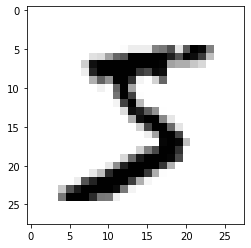

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:], cmap='binary')
plt.show()

Neat!  Always a good thing to look at our data.  Here we can see that each block with a fixed first coordinate forms a picture.  Our data has this shape:

In [3]:
x_train.shape

(60000, 28, 28)

So the image above is 28 x 28.

## Making a Neural Network

Let's make a simple neural network to classify the numbers here.

In [4]:
import tensorflow.keras as keras

model = keras.models.Sequential([
    keras.layers.Reshape((28 * 28,), input_shape = (28,28)),
    keras.layers.Dense(units = 10, activation = 'sigmoid'),
    keras.layers.Dense(units = 10, activation = 'softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


The first layer here reshapes the data.  Each point in our data is a 2D grid of numbers (a 2D tensor), but neural networks are supposed to take in a 1D tensor.  So we have the reshape layer fix this.  We assign an `input_shape` to the first layer so our model knows the expected size of the input data.  The `input_shape` of the other layers is not needed because it can be inferred by the previous.

This is a neural network with one hidden layer that has 10 nodes.  The final (output) layer has 10 nodes with the "softmax" activation function.  This gives us 10 numbers at the end for each image, with each number being between 0 and 1 and adding up to 1.  We can interpret this as a probability of a given image being one of the 10 digits.

Next, we want to compile and train our model.  Before we do that, however, we should talk about "validation sets".  We've learned already that we need to split our data into a "train set" to have the model learn from and a "test set" to evaluate how good the model is.  This is great!  However, we should be a little bit more careful.  If you recall, the reason we have two datasets is because we don't want the model to *overfit* on our training data: that is, we don't want it to learn too specific of a pattern.  The test data is data the model has never seen before, so we can get a more accurate idea of how well the model works on new data from it.

However, what if the model we make turns out to be not so good?  Well, we're going to want to go back and revise our model.  Great!  Unfortunately, doing so means that we are allowing our test set to influence the model in a subtle way.  The best practice is to take your test set and never look at until you're done.  Instead, we can further split our training data into a "train set" and a "validation set".  The validation set works just like the test set does while we're still tweaking our model.  When we are done, we can take the original test set and see how our model does on that.

So let's make the validation set.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train)

Then, we can build and train our model.

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=5,
                    validation_data=(x_valid, y_valid))

Epoch 1/5
1407/1407 [==============================] - 2s 1ms/step - loss: 2.0279 - accuracy: 0.5590 - val_loss: 1.8673 - val_accuracy: 0.6797
Epoch 2/5
1407/1407 [==============================] - 1s 1ms/step - loss: 1.8005 - accuracy: 0.7274 - val_loss: 1.7484 - val_accuracy: 0.7554
Epoch 3/5
1407/1407 [==============================] - 1s 1ms/step - loss: 1.7269 - accuracy: 0.7844 - val_loss: 1.7112 - val_accuracy: 0.7971
Epoch 4/5
1407/1407 [==============================] - 1s 1ms/step - loss: 1.6863 - accuracy: 0.8141 - val_loss: 1.6711 - val_accuracy: 0.8211
Epoch 5/5
1407/1407 [==============================] - 1s 1ms/step - loss: 1.6628 - accuracy: 0.8283 - val_loss: 1.6567 - val_accuracy: 0.8314


The accuracy we get is somewhere around 0.83 on the training set and on the validation set.  The exact number will vary, since there's some randomness involved.

Can we do better?  The answer is, yes!

For the rest of the discussion, take the time to poke around this model and see if you can produce a better one.  Remember, don't look at the test data at the end.  Just stick with the validation set to evaluate the model.  It's okay if your validation set changes from run to run, so long as the test set is kept entirely separate.

Some advice on how to look for a better model:
- Try a bunch of things!  You'll never know what works!  Also, keep in mind that these can be *very* finicky.  Suppose you make one change, A, and see that it makes your model get worse.  You undo the change and try a different change, B, that also makes your model worse.  It's very possible that if you do A and B *together* you'll get a better than what you had!  It's weird that way.
- That being said, if you make a change and you do *better*, you should think about keeping it!  You might undo it a bit as you change more, but it's good to have the best model you've made so far as your current baseline.
- You might want to run your model multiple times when you change things!  That way you know you didn't just get lucky if it looked good or unlucky if it looked bad/the same.

And here are a list of things you might want to change:
- How long the model trains (the number of epochs)
- How many hidden layers are in the model
- How big each hidden layer is (in terms of number of nodes)
- The activation functions.  A list is [here](https://www.tensorflow.org/api_docs/python/tf/keras/activations).  All you need to do is write the name in quotes (e.g. activation = 'relu').  Don't worry if you don't understand the difference between them, it's not too important right now.
- The optimizer we use.  A list is [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).  Some of them might give you an error.  If so, just try a different one.  Again, it's okay if you don't understand how the different optimizers work.  You don't need to!  Again, you can just type the name in quotes (e.g., optimizer='sgd').
- Consider doing a little more pre-processing on the data.  There are tips on how to pre-process data in the [worksheet](https://nbviewer.jupyter.org/urls/www.math.ucla.edu/~egeo/classes/spr21_pic16b-1/week5/ml_basics.ipynb) mentioned at the beginning.

There are still other things you can try.  If you want more ideas, you can ask me or you can look through the [Tensorflow keras API](https://www.tensorflow.org/api_docs/python/tf/keras/).  And, if you find something that works, consider sharing with the class!

Lastly, as a goal to aim towards: 92% accuracy or more is possible with just the changes above.  If you get there, see if you can do better!  There are some more complicated changes you can do (such as adding different types of layers) that can yield better accuracy, although you do not need to attempt those yourself.